In [1]:
#数据预处理
%matplotlib inline
import numpy as np
#import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import missingno as msno

#不加下面这一步进程很容易中断
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ["OMP_NUM_THREADS"] = '9'  

In [2]:
#med
fpath="./data/norm_3_train_med.xlsx"
df1=pd.read_excel(fpath)
df1 = df1[df1.columns.tolist()[1:]]

fpath="./data/norm_4_test_med.xlsx"
df2=pd.read_excel(fpath)
df2 = df2[df2.columns.tolist()[1:]]
    
df1.drop('随访>3', axis=1, inplace=True)
df2.drop('随访>3', axis=1, inplace=True)


df = pd.concat([df1, df2], axis=0)

In [4]:
grouped = df.groupby("随访>=3")
# 获取两个组的数据
group_a = grouped.get_group(1)
group_b = grouped.get_group(0)

#进行秩和检验（不需要样本长度一致），进行第一步筛选--------------------------------------

#https://zhuanlan.zhihu.com/p/555119816
#from scipy.stats import wilcoxon #需要样本长度一致
from scipy.stats import mannwhitneyu

alpha = 0.05

test_name = []
test_p = []

for i in group_a.columns.to_list()[:-1]:
#for i in liu_list:
    tp1 = group_a[i].tolist()
    tp2 = group_b[i].tolist()
    statistic, p_value = mannwhitneyu(tp1, tp2, alternative='two-sided')#wilcoxon(tp1, tp2)
    if p_value < alpha:
        #print("拒绝零假设，两个样本的中位数存在显著差异")
        #print("{0} - {1:.5f}".format( i , p_value))
        test_name.append(i)
        test_p.append(p_value)
    else:
        #print("未拒绝零假设，两个样本的中位数无显著差异")
        pass
print("------秩和检验筛选特征个数:",len(test_name),"------")
for i in range(len(test_name)):
    print("{0} - {1:.5f}".format( test_name[i] , test_p[i]))

------秩和检验筛选特征个数: 7 ------
年龄 - 0.01619
既往治疗 - 0.01943
入路方向（2） - 0.00399
累计症状性出血次数 - 0.00100
出血时间 （3） - 0.03062
入院时MRS - 0.00002
是否神经功能障碍 - 0.01781


In [6]:
test_name.append("随访>=3")

In [9]:
df1 = df[test_name].head(160)
fpath_out="./lasso/_train_med.xlsx"
df1.to_excel(fpath_out,index=False)# index=False 避免为索引添加一列特征   #utf_8_sig   utf-8

df2 = df[test_name].tail(58)
fpath_out="./lasso/_test_med.xlsx"
df2.to_excel(fpath_out,index=False)# index=False 避免为索引添加一列特征   #utf_8_sig   utf-8

In [11]:
#for liu
fpath="./data/norm_1_train_img_sub.xlsx"
df1=pd.read_excel(fpath)
df1 = df1[df1.columns.tolist()[1:]]
df1.drop('随访>3', axis=1, inplace=True)

fpath="./data/norm_2_test_img_sub.xlsx"
df2=pd.read_excel(fpath)
df2 = df2[df2.columns.tolist()[1:]]
df2.drop('随访>3', axis=1, inplace=True)

df = pd.concat([df1, df2], axis=0)

In [12]:
#for liu
name = []
for i in df.columns.tolist()[:-1]:
    if i[:3]=="liu":
        name.append(i)
name.append("随访>=3")
df = df[name]

In [15]:
grouped = df.groupby("随访>=3")
# 获取两个组的数据
group_a = grouped.get_group(1)
group_b = grouped.get_group(0)

#进行秩和检验（不需要样本长度一致），进行第一步筛选--------------------------------------

#https://zhuanlan.zhihu.com/p/555119816
#from scipy.stats import wilcoxon #需要样本长度一致
from scipy.stats import mannwhitneyu

alpha = 0.1#-------------------------对于liu 0.1

test_name = []
test_p = []

for i in group_a.columns.to_list()[:-1]:
#for i in liu_list:
    tp1 = group_a[i].tolist()
    tp2 = group_b[i].tolist()
    statistic, p_value = mannwhitneyu(tp1, tp2, alternative='two-sided')#wilcoxon(tp1, tp2)
    if p_value < alpha:
        #print("拒绝零假设，两个样本的中位数存在显著差异")
        #print("{0} - {1:.5f}".format( i , p_value))
        test_name.append(i)
        test_p.append(p_value)
    else:
        #print("未拒绝零假设，两个样本的中位数无显著差异")
        pass
print("------秩和检验筛选特征个数:",len(test_name),"------")
for i in range(len(test_name)):
    print("{0} - {1:.5f}".format( test_name[i] , test_p[i]))

------秩和检验筛选特征个数: 2 ------
liu_exponential_glszm_SmallAreaLowGrayLevelEmphasis - 0.09955
liu_wavelet-HLH_firstorder_Skewness - 0.05762


In [18]:
df1 = df[test_name].head(160)
fpath_out="./lasso/1_train_liux.xlsx"
df1.to_excel(fpath_out,index=False)# index=False 避免为索引添加一列特征   #utf_8_sig   utf-8

df2 = df[test_name].tail(58)
fpath_out="./lasso/2_test_liux.xlsx"
df2.to_excel(fpath_out,index=False)# index=False 避免为索引添加一列特征   #utf_8_sig   utf-8

In [19]:
#for sub
fpath="./data/norm_1_train_img_sub.xlsx"
df1=pd.read_excel(fpath)
df1 = df1[df1.columns.tolist()[1:]]
df1.drop('随访>3', axis=1, inplace=True)

fpath="./data/norm_2_test_img_sub.xlsx"
df2=pd.read_excel(fpath)
df2 = df2[df2.columns.tolist()[1:]]
df2.drop('随访>3', axis=1, inplace=True)

df = pd.concat([df1, df2], axis=0)

In [20]:
#for sub
name = []
for i in df.columns.tolist()[:-1]:
    if i[:3]=="sub":
        name.append(i)
name.append("随访>=3")
df = df[name]

In [22]:
grouped = df.groupby("随访>=3")
# 获取两个组的数据
group_a = grouped.get_group(1)
group_b = grouped.get_group(0)

#进行秩和检验（不需要样本长度一致），进行第一步筛选--------------------------------------

#https://zhuanlan.zhihu.com/p/555119816
#from scipy.stats import wilcoxon #需要样本长度一致
from scipy.stats import mannwhitneyu

alpha = 0.05#-------------------------对于sub 0.1

test_name = []
test_p = []

for i in group_a.columns.to_list()[:-1]:
#for i in liu_list:
    tp1 = group_a[i].tolist()
    tp2 = group_b[i].tolist()
    statistic, p_value = mannwhitneyu(tp1, tp2, alternative='two-sided')#wilcoxon(tp1, tp2)
    if p_value < alpha:
        #print("拒绝零假设，两个样本的中位数存在显著差异")
        #print("{0} - {1:.5f}".format( i , p_value))
        test_name.append(i)
        test_p.append(p_value)
    else:
        #print("未拒绝零假设，两个样本的中位数无显著差异")
        pass
print("------秩和检验筛选特征个数:",len(test_name),"------")
for i in range(len(test_name)):
    print("{0} - {1:.5f}".format( test_name[i] , test_p[i]))

------秩和检验筛选特征个数: 531 ------
sub1_original_firstorder_Energy - 0.02935
sub1_original_gldm_DependenceNonUniformity - 0.04137
sub1_original_gldm_GrayLevelNonUniformity - 0.02534
sub1_original_glrlm_RunVariance - 0.03737
sub1_original_glszm_LargeAreaEmphasis - 0.03190
sub1_original_glszm_LargeAreaHighGrayLevelEmphasis - 0.03190
sub1_original_glszm_LargeAreaLowGrayLevelEmphasis - 0.03190
sub1_original_glszm_SmallAreaEmphasis - 0.03579
sub1_original_glszm_SmallAreaHighGrayLevelEmphasis - 0.03579
sub1_original_glszm_SmallAreaLowGrayLevelEmphasis - 0.03579
sub1_original_glszm_ZonePercentage - 0.02935
sub1_exponential_firstorder_Energy - 0.02534
sub1_exponential_gldm_DependenceNonUniformity - 0.04137
sub1_exponential_gldm_GrayLevelNonUniformity - 0.02534
sub1_exponential_glrlm_RunVariance - 0.03737
sub1_exponential_glszm_LargeAreaEmphasis - 0.03190
sub1_exponential_glszm_LargeAreaHighGrayLevelEmphasis - 0.03190
sub1_exponential_glszm_LargeAreaLowGrayLevelEmphasis - 0.03190
sub1_exponential_gls

In [ ]:
import sklearn
from sklearn.linear_model import LassoCV

y=df[["随访>=3"]]
X=df[test_name]
fold = 3

#根据AUC指标获得最佳lambda，并绘图--------------------------------------

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import matplotlib.ticker as ticker
# 创建 Lasso 模型
lasso = Lasso(max_iter=100000)

# 创建交叉验证分割器
cv = StratifiedKFold(n_splits=fold)

# 指定参数范围
alphas = np.logspace(-5, -2, 50)

# 使用 GridSearchCV 搜索最佳 alpha 值
grid_search = GridSearchCV(lasso, {'alpha': alphas}, cv=cv, scoring='roc_auc')
grid_search.fit(X, y)

# 获取交叉验证结果
results = grid_search.cv_results_

# 提取相关信息
AUCs_mean = results['mean_test_score']
AUCs_std = results['std_test_score']
alphas = results['param_alpha'].data.astype(float)

# 绘制 Lambda 选择图
plt.figure()
plt.errorbar(alphas, AUCs_mean, yerr=AUCs_std,
             fmt='o', ms=3, mfc='r', mec='r', ecolor='lightblue', elinewidth=2, capsize=4, capthick=1)
plt.semilogx()
plt.axvline(grid_search.best_params_['alpha'], color='black', ls='--')
plt.xlabel('Lambda')
plt.ylabel('AUC')
ax = plt.gca()
y_major_locator = ticker.MultipleLocator(0.05)
ax.yaxis.set_major_locator(y_major_locator)
plt.show()

best_lam = grid_search.best_params_['alpha']
print("best lambda:",best_lam)

C:\Users\pc_207\Anaconda3\envs\torch\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


最优lamda： 0.0032374575428176433
保留特征数： 39
淘汰特征数： 492
------------------------------
sub1_wavelet-LLH_firstorder_Skewness --- 0.08230766952186784
sub1_wavelet-LHL_glrlm_GrayLevelNonUniformityNormalized --- 0.19626027789382008
sub1_wavelet-LHH_glcm_Imc2 --- -0.2828301002343762
sub1_wavelet-HLL_glcm_SumEntropy --- -0.19132186239657023
sub1_wavelet-HLL_gldm_SmallDependenceLowGrayLevelEmphasis --- 0.06936722125917813
sub1_wavelet-HLL_glszm_SmallAreaEmphasis --- -0.15562993473622988
sub1_wavelet-HLH_glszm_GrayLevelNonUniformityNormalized --- -0.1406310476963874
sub1_wavelet-HHL_firstorder_Mean --- -0.13079098955673865
sub1_wavelet-HHH_firstorder_Mean --- 0.1112274553437569
sub1_wavelet-HHH_glrlm_GrayLevelNonUniformityNormalized --- 0.0955187012269105
sub1_wavelet-HHH_glrlm_GrayLevelVariance --- -1.1303510536518075e-09
sub1_wavelet-LLL_firstorder_Energy --- -0.25989061686955633
sub2_wavelet-LLH_glszm_SmallAreaHighGrayLevelEmphasis --- -0.09027128974222738
sub2_wavelet-LHH_firstorder_Skewness -

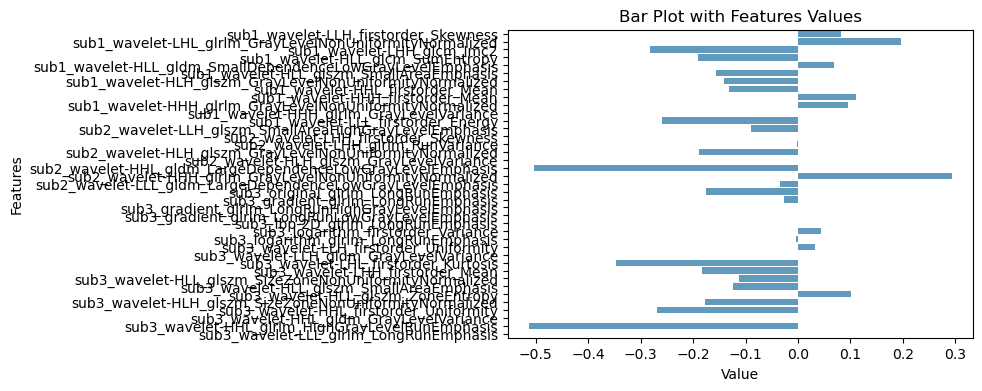

In [24]:
#根据最佳lambda，第二次筛选特征，并绘制权重图--------------------------------------

#model_lassoCV = LassoCV(alphas = alphas, cv = fold, max_iter = 100000).fit(X,y)
model_lassoCV = LassoCV(alphas = [best_lam], cv = fold, max_iter = 100000).fit(X,y)


name = X.columns.tolist()
coef = model_lassoCV.coef_.tolist()
print("最优lamda：",best_lam)
print("保留特征数：",len(coef)-coef.count(0))
print("淘汰特征数：",coef.count(0))
print("------------------------------")
indices = [i for i, value in enumerate(coef) if value != 0]
feature = [name[i] for i in indices]
feature_coef = [coef[i] for i in indices]
for i in range(len(feature)):
    print(feature[i],"---",feature_coef[i])
    
# 示例数据
data = {'Features': feature,
        'Value': feature_coef}

# 转换为 DataFrame
temp = pd.DataFrame(data)

# 绘制带有正负值的条形图
plt.figure(figsize=(6, 4))
color = sns.color_palette('Blues')[3]
ax = sns.barplot(y='Features', x='Value', data=temp, color = color, dodge=True)#通过调换xy旋转整个图
#ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=8)
plt.title('Bar Plot with Features Values')
plt.show()

In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

dff = df.copy()
get_f = feature.copy()
get_f.append("随访>=3")
dff = dff[get_f]

target_name="随访>=3"

feature___=dff.columns.tolist()
feature___.remove( target_name )
y=df[ target_name ]
X=df[feature___].values



# 使用线性回归模型和RFE进行特征选择
model = LinearRegression()
rfe = RFE(model, n_features_to_select=16)  # 设置希望保留的特征数量
X_selected = rfe.fit_transform(X, y)

# 获取选择的特征的布尔掩码
selected_features_mask = rfe.support_
#print(selected_features_mask)

# 获取选择的特征名字
selected_feature_names = [get_f[i] for i, selected in enumerate(selected_features_mask) if selected]

# 输出选择后的特征名字
selected_feature_names

['sub1_wavelet-HHH_glrlm_GrayLevelNonUniformityNormalized',
 'sub1_wavelet-HHH_glrlm_GrayLevelVariance',
 'sub2_wavelet-HLH_glszm_GrayLevelNonUniformityNormalized',
 'sub2_wavelet-HLH_glszm_GrayLevelVariance',
 'sub3_original_glrlm_LongRunEmphasis',
 'sub3_gradient_glrlm_LongRunEmphasis',
 'sub3_gradient_glrlm_LongRunHighGrayLevelEmphasis',
 'sub3_gradient_glrlm_LongRunLowGrayLevelEmphasis',
 'sub3_lbp-2D_glrlm_LongRunEmphasis',
 'sub3_logarithm_glrlm_LongRunEmphasis',
 'sub3_wavelet-LLH_firstorder_Uniformity',
 'sub3_wavelet-LLH_gldm_GrayLevelVariance',
 'sub3_wavelet-HHL_firstorder_Uniformity',
 'sub3_wavelet-HHL_gldm_GrayLevelVariance',
 'sub3_wavelet-HHL_glrlm_HighGrayLevelRunEmphasis',
 'sub3_wavelet-LLL_glrlm_LongRunEmphasis']

In [38]:
df1 = df.head(160)
fpath_out="./lasso/3_train_subx.xlsx"
df1.to_excel(fpath_out,index=False)# index=False 避免为索引添加一列特征   #utf_8_sig   utf-8

df2 = df.tail(58)
fpath_out="./lasso/4_test_subx.xlsx"
df2.to_excel(fpath_out,index=False)# index=False 避免为索引添加一列特征   #utf_8_sig   utf-8